# Lecture: Convolution

## Section 1: Preparation

### Install the libraries

In [1]:
# Import the libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import pyrealsense2 as rs2
import cv2


### Capture an image using realsense camera

In [2]:
pipeline = rs2.pipeline()
config = rs2.config()

config.enable_stream(rs2.stream.color, 640, 480, rs2.format.bgr8, 30)
config.enable_stream(rs2.stream.depth, 640, 480, rs2.format.z16, 30)

pipeline.start(config)

# Display the livestream
while True:
    frame = pipeline.wait_for_frames()
    color_frame = frame.get_color_frame()

    color_image = np.asanyarray(color_frame.get_data())

    cv2.imshow("Captured Image", color_image)

    if cv2.waitKey(1) == ord('q'):
        break

cv2.imwrite('photo.jpg', color_image)

cv2.destroyAllWindows()

pipeline.stop()


RuntimeError: No device connected

## Section 2: Image Padding

The raw numpy array: 


array([[[ 42, 162, 196],
        [ 41, 160, 194],
        [ 42, 155, 189],
        ...,
        [  8,  12,  11],
        [ 13,  13,  15],
        [ 12,  12,  14]],

       [[ 43, 163, 197],
        [ 43, 162, 196],
        [ 42, 156, 190],
        ...,
        [  8,  12,  11],
        [ 12,  12,  14],
        [ 11,  11,  13]],

       [[ 41, 164, 197],
        [ 43, 163, 197],
        [ 40, 157, 190],
        ...,
        [  7,  11,  10],
        [ 11,  11,  13],
        [ 10,  10,  12]],

       ...,

       [[ 83,  75,  54],
        [ 89,  81,  60],
        [ 92,  81,  61],
        ...,
        [252, 254, 214],
        [252, 254, 214],
        [252, 254, 214]],

       [[ 88,  77,  55],
        [ 93,  83,  58],
        [ 94,  82,  58],
        ...,
        [252, 254, 215],
        [253, 255, 216],
        [253, 255, 216]],

       [[ 92,  82,  57],
        [ 96,  86,  61],
        [ 98,  86,  60],
        ...,
        [253, 255, 216],
        [253, 255, 218],
        [253, 255, 218]]

The captured image


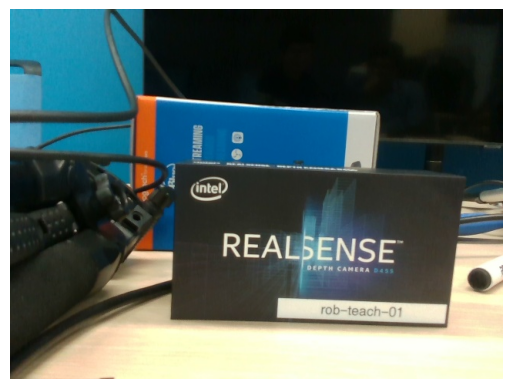

In [6]:
# Load the image
try:
    img = Image.open('photo.jpg')
    img_array = np.array(img)
    # Split the image into RGB channels
    if img_array.shape[-1] != 3: # Check if the image has 3 channels (RGB)
      print("Error: The image does not appear to be an RGB image.")
    print("The raw numpy array: ")
    display(img_array)

    print("The captured image")
    plt.axis("off")
    plt.imshow(img_array)


except FileNotFoundError:
    print("Error: The file photo.jpg was not found. Please make sure to capture an image first.")
except Exception as e:
    print(f"An error occurred: {e}")

### Padding with numpy

In [7]:
# Sample matrix
import numpy as np
sample_matrix = np.array([
    [2, 1, 4, 4, 7],
    [1, 2, 2, 3, 6],
    [3, 3, 5, 8, 9],
    [5, 2, 2, 6, 7],
    [8, 3, 2, 1, 3]
])
print(sample_matrix)
# Padding using numpy
sample_matrix_pad = np.pad(sample_matrix, pad_width=1, mode='constant', constant_values=0)
print("Zero padding: ")
print(sample_matrix_pad)
print("Maximum padding: ")
sample_matrix_pad = np.pad(sample_matrix, pad_width=1, mode='maximum')
print(sample_matrix_pad)
print("Mean padding: ")
sample_matrix_pad = np.pad(sample_matrix, pad_width=1, mode='mean')
print(sample_matrix_pad)
print("Reflect padding: ")
sample_matrix_pad = np.pad(sample_matrix, pad_width=1, mode='reflect')
print(sample_matrix_pad)
print("Wrap padding: ")
sample_matrix_pad = np.pad(sample_matrix, pad_width=1, mode='wrap')
print(sample_matrix_pad)
print("Symmetric padding: ")
sample_matrix_pad = np.pad(sample_matrix, pad_width=1, mode='symmetric')
print(sample_matrix_pad)

[[2 1 4 4 7]
 [1 2 2 3 6]
 [3 3 5 8 9]
 [5 2 2 6 7]
 [8 3 2 1 3]]
Zero padding: 
[[0 0 0 0 0 0 0]
 [0 2 1 4 4 7 0]
 [0 1 2 2 3 6 0]
 [0 3 3 5 8 9 0]
 [0 5 2 2 6 7 0]
 [0 8 3 2 1 3 0]
 [0 0 0 0 0 0 0]]
Maximum padding: 
[[9 8 3 5 8 9 9]
 [7 2 1 4 4 7 7]
 [6 1 2 2 3 6 6]
 [9 3 3 5 8 9 9]
 [7 5 2 2 6 7 7]
 [8 8 3 2 1 3 8]
 [9 8 3 5 8 9 9]]
Mean padding: 
[[4 4 2 3 4 6 4]
 [4 2 1 4 4 7 4]
 [3 1 2 2 3 6 3]
 [6 3 3 5 8 9 6]
 [4 5 2 2 6 7 4]
 [3 8 3 2 1 3 3]
 [4 4 2 3 4 6 4]]
Reflect padding: 
[[2 1 2 2 3 6 3]
 [1 2 1 4 4 7 4]
 [2 1 2 2 3 6 3]
 [3 3 3 5 8 9 8]
 [2 5 2 2 6 7 6]
 [3 8 3 2 1 3 1]
 [2 5 2 2 6 7 6]]
Wrap padding: 
[[3 8 3 2 1 3 8]
 [7 2 1 4 4 7 2]
 [6 1 2 2 3 6 1]
 [9 3 3 5 8 9 3]
 [7 5 2 2 6 7 5]
 [3 8 3 2 1 3 8]
 [7 2 1 4 4 7 2]]
Symmetric padding: 
[[2 2 1 4 4 7 7]
 [2 2 1 4 4 7 7]
 [1 1 2 2 3 6 6]
 [3 3 3 5 8 9 9]
 [5 5 2 2 6 7 7]
 [8 8 3 2 1 3 3]
 [8 8 3 2 1 3 3]]


## Section 2: Image Correlation vs. Convolution

In [ ]:
### Consider a grayscale image

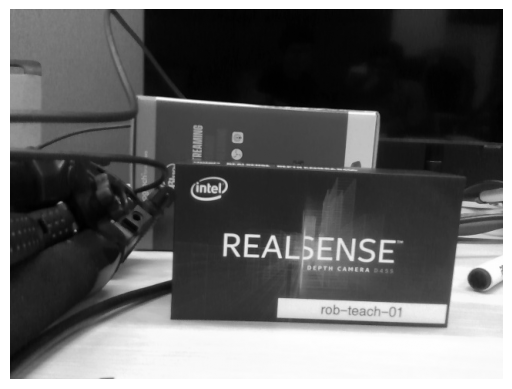

In [8]:
# Convert the image into gray-scale format
img = Image.open('photo.jpg')
# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image back to a NumPy array for display
img_gray_array = np.array(img_gray)

plt.axis("off")
plt.imshow(img_gray_array, cmap="gray")
plt.show()

### Image Correlation vs. Convolution

In [9]:
# Image Correlation
def image_correlation(image_array, kernel):
    # Assume a gray-scale image
    assert len(image_array.shape) == 2, "Assume a grayscale image so far"
    H, W = image_array.shape
    kh, kw = kernel.shape
    
    # Correlation
    image_array_processed= np.zeros((H - kh + 1, W - kw + 1))
    for i in range(H - kh + 1):
        for j in range(W - kw + 1):
            image_array_processed[i, j] = np.sum(image_array[i:i+kh, j:j+kw] * kernel)
    return image_array_processed

def image_convolution_vanilla(image_array, kernel):
    # Assume a gray-scale image
    assert len(image_array.shape) == 2, "Assume a grayscale image so far"
    H, W = image_array.shape
    kh, kw = kernel.shape

    # Convolution
    image_array_processed= np.zeros((H - kh + 1, W - kw + 1))
    for i in range(kh-1, H):
        for j in range(kw-1, W):
            res = 0
            for k in range(kh):
                for l in range(kw):
                    res += image_array[i-k, j-l] * kernel[k, l]
            image_array_processed[i-kh+1, j-kw+1] = res
    return image_array_processed

### Experiments

In [10]:
sample_matrix = np.array([
    [2, 1, 4, 4, 7],
    [1, 2, 2, 3, 6],
    [3, 3, 5, 8, 9],
    [5, 2, 2, 6, 7],
    [8, 3, 2, 1, 3]
])
kernel = np.array([
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 1]
])

M = sample_matrix.shape[0]
N = kernel.shape[0]
sample_matrix_pad = np.pad(sample_matrix, pad_width=int((N-1)/2), mode='constant', constant_values=0)
print("Correlation")
matrix_corr = image_correlation(sample_matrix_pad, kernel)
print(matrix_corr)
print("Convolution")
matrix_conv = image_convolution_vanilla(sample_matrix_pad, kernel)
print(matrix_conv)
print("Correlation applied with a flipped matrix")
kernel_flipped = np.flip(kernel)
matrix_corr_flip = image_correlation(sample_matrix_pad, kernel_flipped)
print(matrix_corr_flip)

Correlation
[[ 3.  7.  9. 15.  3.]
 [ 7. 13. 19. 28. 19.]
 [ 6. 15. 20. 23. 15.]
 [ 8. 18. 18. 25. 18.]
 [ 8.  9.  5. 11. 13.]]
Convolution
[[ 3.  6.  6. 13. 10.]
 [ 7. 15. 20. 30. 16.]
 [ 9. 10. 16. 26. 18.]
 [14. 18. 16. 20. 17.]
 [ 2. 15. 11. 11.  7.]]
Correlation applied with a flipped matrix
[[ 3.  6.  6. 13. 10.]
 [ 7. 15. 20. 30. 16.]
 [ 9. 10. 16. 26. 18.]
 [14. 18. 16. 20. 17.]
 [ 2. 15. 11. 11.  7.]]


### A simpler version of image convolution

In [11]:
def image_convolution(image_array, kernel):
    kernel_flipped = np.flip(kernel)
    return image_correlation(image_array, kernel_flipped)
print("Convolution (simplified): ")
print(image_convolution(sample_matrix_pad, kernel))

Convolution (simplified): 
[[ 3.  6.  6. 13. 10.]
 [ 7. 15. 20. 30. 16.]
 [ 9. 10. 16. 26. 18.]
 [14. 18. 16. 20. 17.]
 [ 2. 15. 11. 11.  7.]]


## Section 3: Image Convolution as Feature Extraction

Gaussian kernel: 
[[0.04535423 0.05664058 0.04535423]
 [0.05664058 0.07073553 0.05664058]
 [0.04535423 0.05664058 0.04535423]]
Gaussian blurring: 


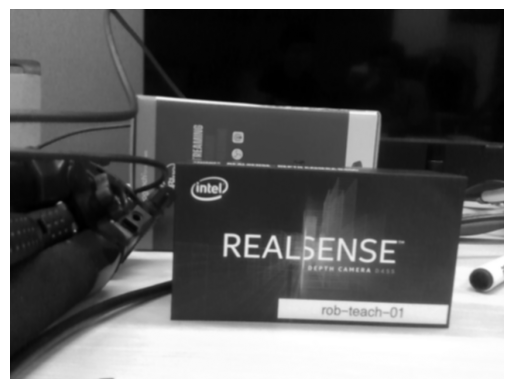

In [12]:
# Define the gaussian kernel
def create_gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / (2 * np.pi * sigma**2) # Normalization constant

kernel_size = 3
sigma = 1.5
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)
print("Gaussian kernel: ")
print(gaussian_kernel)
img_gray_array_filtered = image_convolution(img_gray_array, gaussian_kernel)
print("Gaussian blurring: ")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap="gray")
plt.show()


Vertical edge detection: 


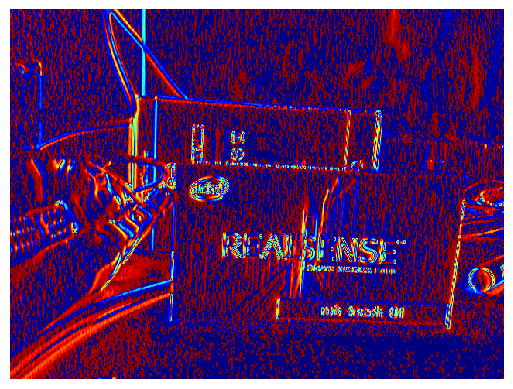

In [13]:
# Define the vertical edge detection kernel
vertical_edge_kernel = np.array([
    [ -1, 0,  1],
    [-1,  0, 1],
    [ -1, 0,  1]
])
img_gray_array_filtered = image_convolution(img_gray_array, vertical_edge_kernel)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Vertical edge detection: ")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()

Horizontal edge detection


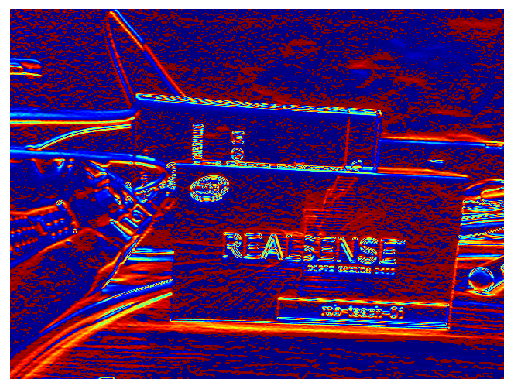

In [14]:
# Define the horizontal edge detection kernel
horizontal_edge_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
img_gray_array_filtered = image_convolution(img_gray_array, horizontal_edge_kernel)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Horizontal edge detection")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()

### Associativity & Commutativity

Convolution in order
(480, 640)


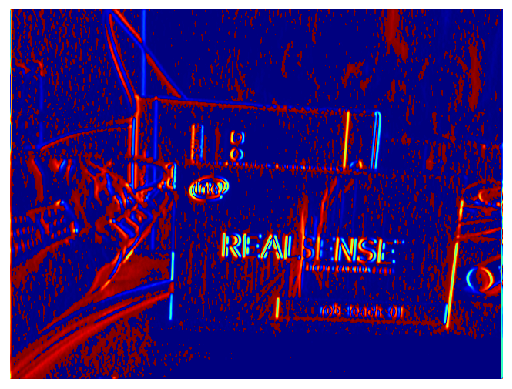

In [15]:
img_gray_array_pad = np.pad(img_gray_array, pad_width=1, mode='constant', constant_values=0)
img_gray_array_filtered = image_convolution(img_gray_array_pad, gaussian_kernel)
img_gray_array_pad = np.pad(img_gray_array_filtered, pad_width=1, mode='constant', constant_values=0)
img_gray_array_filtered = image_convolution(img_gray_array_pad, vertical_edge_kernel)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Convolution in order")
print(img_gray_array_filtered.shape)
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()

Convolution on one combined filter
Applied filter
[[-0.12737612  0.          0.12737612]
 [-0.1840167   0.          0.1840167 ]
 [-0.12737612  0.          0.12737612]]


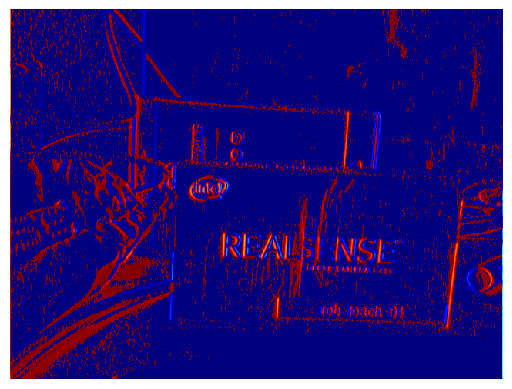

In [16]:
gaussian_kernel_pad = np.pad(gaussian_kernel, pad_width=1, mode='constant', constant_values=0)
combined_filter = image_convolution(gaussian_kernel_pad, vertical_edge_kernel)
img_gray_array_pad = np.pad(img_gray_array, pad_width=1, mode='constant', constant_values=0)
img_gray_array_filtered = image_convolution(img_gray_array_pad, combined_filter)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Convolution on one combined filter")
print("Applied filter")
print(combined_filter)
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()

Convolution on one filter constructed in a swapped order
Applied filter: 
[[-0.12737612  0.          0.12737612]
 [-0.1840167   0.          0.1840167 ]
 [-0.12737612  0.          0.12737612]]


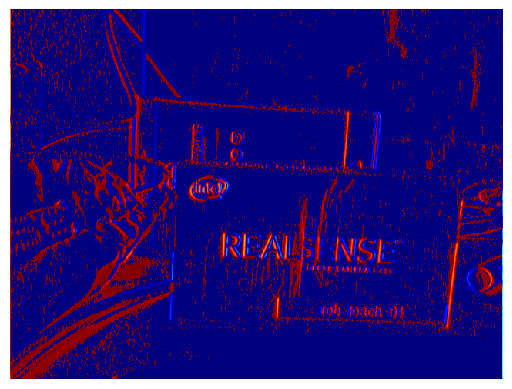

In [17]:
vertical_edge_kernel_pad = np.pad(vertical_edge_kernel, pad_width=1, mode='constant', constant_values=0)
combined_filter = image_convolution(vertical_edge_kernel_pad, gaussian_kernel)
img_gray_array_pad = np.pad(img_gray_array, pad_width=1, mode='constant', constant_values=0)
img_gray_array_filtered = image_convolution(img_gray_array_pad, combined_filter)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Convolution on one filter constructed in a swapped order")
print("Applied filter: ")
print(combined_filter)
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()

## Sobel filter

### Let's see how the combined filter looks like again!

In [18]:
print(combined_filter)

[[-0.12737612  0.          0.12737612]
 [-0.1840167   0.          0.1840167 ]
 [-0.12737612  0.          0.12737612]]


### Approximately, we can construct our Sobel filter as

Convolution on Sobel filter


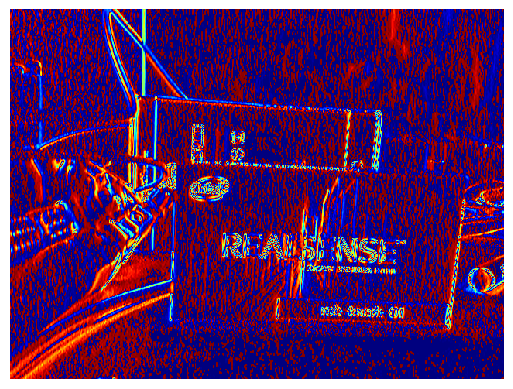

In [19]:
sobel_filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
img_gray_array_filtered = image_convolution(img_gray_array, sobel_filter)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Convolution on Sobel filter")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()

### Sobel filter along the other direction

In [ ]:
sobel_filter = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
img_gray_array_filtered = image_convolution(img_gray_array, sobel_filter)
img_gray_array_filtered = img_gray_array_filtered.astype(np.uint8)
print("Convolution on Sobel filter")
plt.axis("off")
plt.imshow(img_gray_array_filtered, cmap='jet', interpolation='nearest')

plt.show()